In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Create the DataFrame
data = {
    'Customer ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [25, 35, 45, 30, 20, 50, 55, 40, 28, 32],
    'Income': [50000, 75000, 90000, 60, 30000, 80000, 100000, 70000, 40000, 55000],
    'Spending Score': [75, 50, 85, 5, 40, None, 90, 55, 30, 65],
    'Purchase Frequency': [4, 6, 3, 5, 2, 4, 2, 7, 4, 6]
}


In [4]:
df = pd.DataFrame(data)

In [5]:
# Handle missing values by imputing with the mean
df['Income'].fillna(df['Income'].mean(), inplace=True)
df['Spending Score'].fillna(df['Spending Score'].mean(), inplace=True)
df['Purchase Frequency'].fillna(df['Purchase Frequency'].mean(), inplace=True)


In [6]:

# Check if there are any remaining missing values
print(df.isnull().sum())

Customer ID           0
Age                   0
Income                0
Spending Score        0
Purchase Frequency    0
dtype: int64


In [7]:
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Age', 'Income', 'Spending Score', 'Purchase Frequency']])


In [8]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


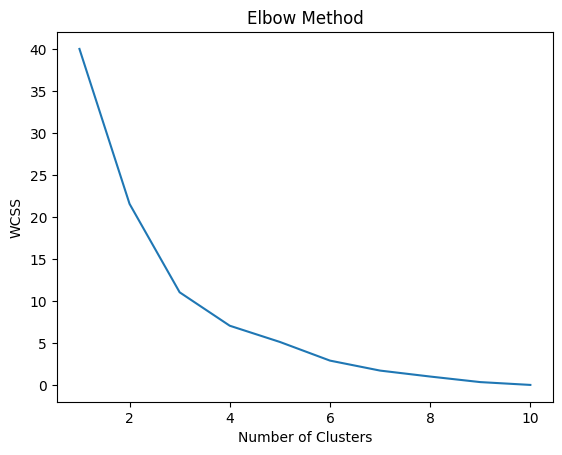

In [9]:
# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

In [10]:
# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_data)


In [11]:

# Display the DataFrame with the assigned clusters
print(df)

   Customer ID  Age  Income  Spending Score  Purchase Frequency  Cluster
0            1   25   50000            75.0                   4        2
1            2   35   75000            50.0                   6        2
2            3   45   90000            85.0                   3        1
3            4   30      60             5.0                   5        0
4            5   20   30000            40.0                   2        0
5            6   50   80000            55.0                   4        1
6            7   55  100000            90.0                   2        1
7            8   40   70000            55.0                   7        2
8            9   28   40000            30.0                   4        0
9           10   32   55000            65.0                   6        2


In [12]:
# Interpret the Clusters
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

         Customer ID   Age        Income  Spending Score  Purchase Frequency
Cluster                                                                     
0           6.000000  26.0  23353.333333       25.000000            3.666667
1           5.333333  50.0  90000.000000       76.666667            3.000000
2           5.250000  33.0  62500.000000       61.250000            5.750000
